### 고혈압 데이터 분석

In [1]:
#고혈압 데이터 로드
import pandas as pd
df = pd.read_csv('./preprocessing_data.csv')
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_female,sex_male,cp_0,cp_1,fbs_0,fbs_1,restecg_0,restecg_1,exang_0,exang_1,slope_0,slope_1,ca_0,ca_1
0,57.0,145,233,150,2.3,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0
1,64.0,130,250,187,3.5,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0
2,52.0,130,204,172,1.4,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0
3,56.0,120,236,178,0.8,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0
4,66.0,120,354,163,0.6,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0


#### 데이터 확인 및 전처리

In [2]:
#종속변수와 독립변수로 분할
cols = list(df.columns)
cols.remove('target')
X = df[cols]
y = df['target']
X.head(), y.head()

(    age  trestbps  chol  thalach  oldpeak  sex_female  sex_male  cp_0  cp_1  \
 0  57.0       145   233      150      2.3           0         1     0     1   
 1  64.0       130   250      187      3.5           1         0     0     1   
 2  52.0       130   204      172      1.4           0         1     0     1   
 3  56.0       120   236      178      0.8           1         0     0     1   
 4  66.0       120   354      163      0.6           1         0     1     0   
 
    fbs_0  fbs_1  restecg_0  restecg_1  exang_0  exang_1  slope_0  slope_1  \
 0      0      1          1          0        1        0        0        1   
 1      1      0          0          1        1        0        0        1   
 2      1      0          1          0        1        0        0        1   
 3      1      0          0          1        1        0        0        1   
 4      1      0          0          1        0        1        0        1   
 
    ca_0  ca_1  
 0     1     0  
 1     1     0

In [3]:
#데이터 불균형 확인
y.value_counts()

1    14004
0    11686
Name: target, dtype: int64

In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['target'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['target'].value_counts()

0    11686
1    11686
Name: target, dtype: int64

In [5]:
X = X_samp
y = y_samp.values.ravel()

In [6]:
#로지스틱 회귀분석
import statsmodels.api as sm
model = sm.Logit(y, X)
result = model.fit()
result.summary2()

         Current function value: 0.375107
         Iterations: 35


c:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.459     
Dependent Variable:    y                   AIC:                 17560.0146
Date:                  2023-07-10 17:16    BIC:                 17664.7854
No. Observations:      23372               Log-Likelihood:      -8767.0   
Df Model:              12                  LL-Null:             -16200.   
Df Residuals:          23359               LLR p-value:         0.0000    
Converged:             0.0000              Scale:               1.0000    
No. Iterations:        35.0000                                            
--------------------------------------------------------------------------
            Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
--------------------------------------------------------------------------
age         0.0029       0.0013   2.2893 0.0221        0.0004       0.0054
trestbps   -0.0181       0.0011 -16.2283 0.0000       -0.0203      -0.0159
chol        0.0003       0.0004   0.7681 0.4424       -0.0005       0.0011
thalach     0.0089       0.0010   8.9975 0.0000        0.0070       0.0108
oldpeak    -0.6343       0.0206 -30.8581 0.0000       -0.6746      -0.5940
sex_female  0.1633 1249950.2872   0.0000 1.0000 -2449857.3820 2449857.7086
sex_male    0.1643 1255162.2119   0.0000 1.0000 -2460072.5658 2460072.8944
cp_0       -0.7279          nan      nan    nan           nan          nan
cp_1        1.0555          nan      nan    nan           nan          nan
fbs_0       0.0352          nan      nan    nan           nan          nan
fbs_1       0.2924          nan      nan    nan           nan          nan
restecg_0  -0.0309  598644.6493  -0.0000 1.0000 -1173321.9831 1173321.9213
restecg_1   0.3585  593966.7962   0.0000 1.0000 -1164153.1700 1164153.8870
exang_0     0.6254          nan      nan    nan           nan          nan
exang_1    -0.2978          nan      nan    nan           nan          nan
slope_0    -0.2756          nan      nan    nan           nan          nan
slope_1     0.6032          nan      nan    nan           nan          nan
ca_0        1.2438          nan      nan    nan           nan          nan
ca_1       -0.9162          nan      nan    nan           nan          nan
==========================================================================

"""

In [7]:
X = X.drop(columns='chol')
cols.remove('chol')

In [8]:
#'chol'컬럼을 제거한 모형
model = sm.Logit(y, X)
result = model.fit()
result.summary2()

         Current function value: 0.375120
         Iterations: 35


c:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.459     
Dependent Variable:    y                   AIC:                 17558.6065
Date:                  2023-07-10 17:16    BIC:                 17655.3180
No. Observations:      23372               Log-Likelihood:      -8767.3   
Df Model:              11                  LL-Null:             -16200.   
Df Residuals:          23360               LLR p-value:         0.0000    
Converged:             0.0000              Scale:               1.0000    
No. Iterations:        35.0000                                            
--------------------------------------------------------------------------
            Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
--------------------------------------------------------------------------
age         0.0029       0.0013   2.2977 0.0216        0.0004       0.0054
trestbps   -0.0180       0.0011 -16.2578 0.0000       -0.0201      -0.0158
thalach     0.0090       0.0010   9.0730 0.0000        0.0070       0.0109
oldpeak    -0.6349       0.0205 -30.9077 0.0000       -0.6751      -0.5946
sex_female  0.1708          nan      nan    nan           nan          nan
sex_male    0.1719          nan      nan    nan           nan          nan
cp_0       -0.7197  562845.2654  -0.0000 1.0000 -1103157.1688 1103155.7294
cp_1        1.0624  556103.1010   0.0000 1.0000 -1089940.9873 1089943.1122
fbs_0       0.0421          nan      nan    nan           nan          nan
fbs_1       0.3006          nan      nan    nan           nan          nan
restecg_0  -0.0201  271706.6319  -0.0000 1.0000  -532535.2331  532535.1928
restecg_1   0.3629  385257.6229   0.0000 1.0000  -755090.7029  755091.4286
exang_0     0.6324 1005799.9279   0.0000 1.0000 -1971331.0019 1971332.2667
exang_1    -0.2897 1005799.9279  -0.0000 1.0000 -1971331.9240 1971331.3447
slope_0    -0.2676          nan      nan    nan           nan          nan
slope_1     0.6104          nan      nan    nan           nan          nan
ca_0        1.2504          nan      nan    nan           nan          nan
ca_1       -0.9077          nan      nan    nan           nan          nan
==========================================================================

"""

c:\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


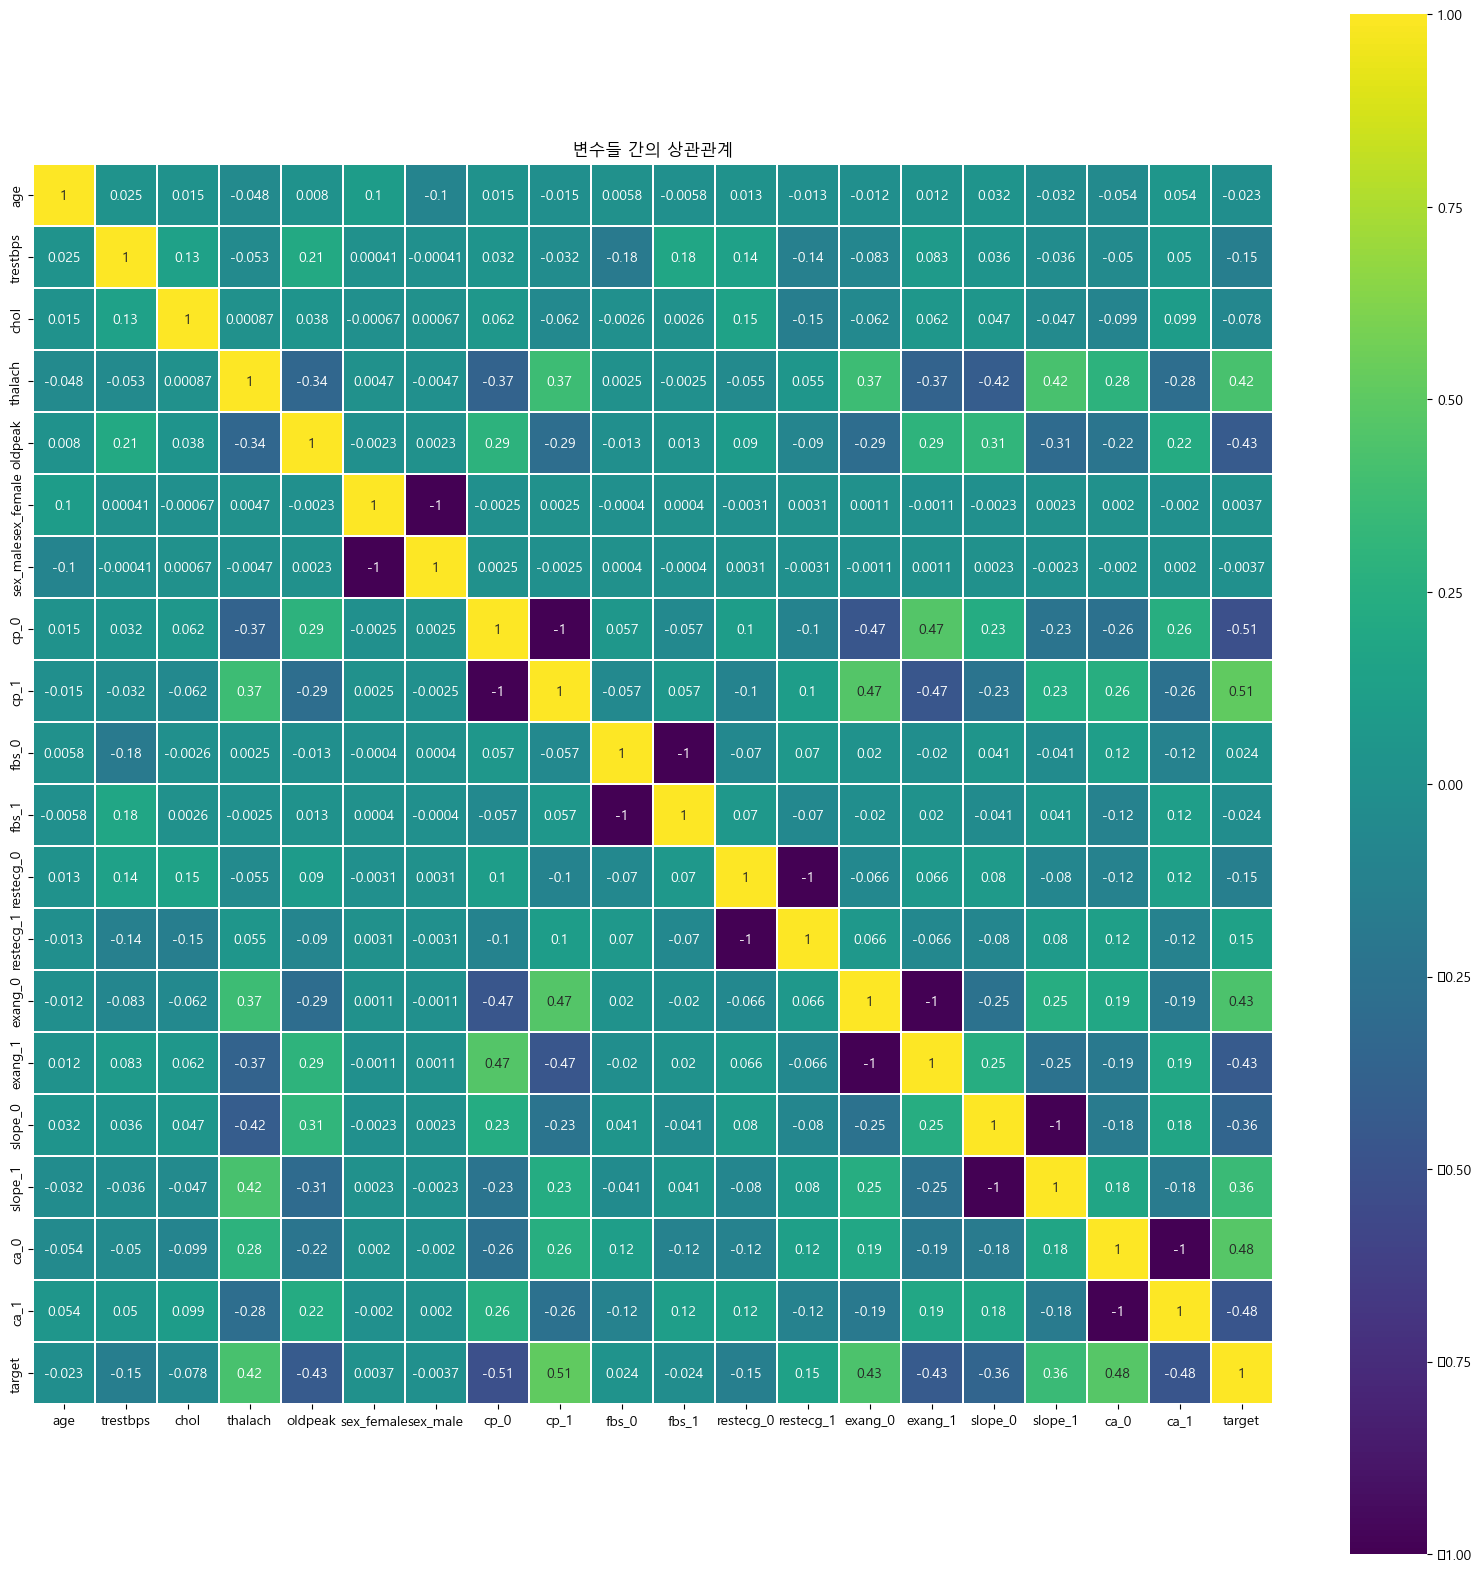

In [30]:
#상관계수 행렬 그래프
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

plt.figure(figsize=(20,20))
plt.rc('font', size=10)
sns.heatmap(df_samp.corr(), linewidths=0.01, square=True, annot=True,
            cmap=plt.cm.viridis, linecolor='white')
plt.title('변수들 간의 상관관계')
plt.show()

In [31]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

c:\anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.015822,age
1,1.099028,trestbps
2,1.471494,thalach
3,1.293678,oldpeak
4,inf,sex_female
5,inf,sex_male
6,inf,cp_0
7,inf,cp_1
8,inf,fbs_0
9,inf,fbs_1


In [32]:
#학습용과 검증용으로 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

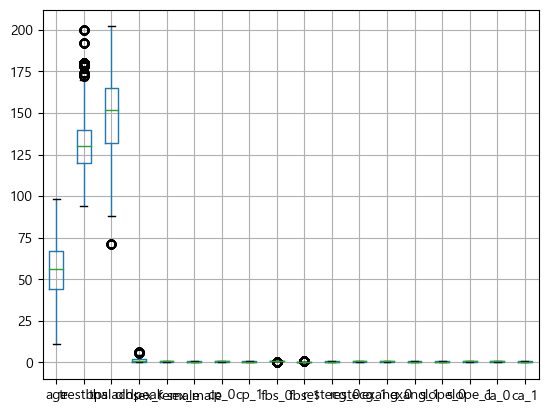

In [33]:
#스케일링 전 박스플롯
X_train.boxplot()
plt.show()

In [34]:
#스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=cols)
X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)

c:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


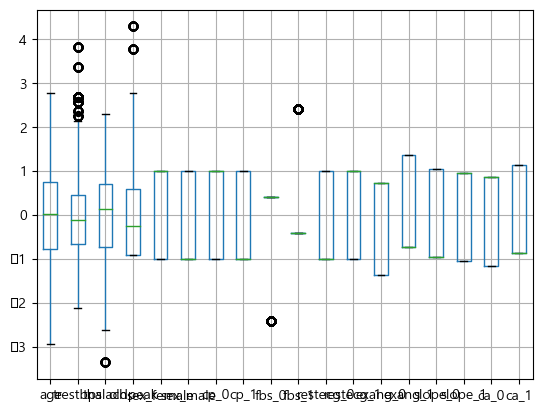

In [35]:
#스케일링 후 박스플롯
X_train.boxplot()
plt.show()

#### 데이터 분석

In [36]:
#모형별 정확도를 저장할 리스트
result_tr = []
result_te = []

In [37]:
#로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=10, max_iter=1000)
logit.fit(X_train, y_train)
print('학습용:', logit.score(X_train, y_train))
print('검증용:', logit.score(X_test, y_test))

학습용: 0.8488527571268117
검증용: 0.8468449197860962


In [38]:
#파라미터 튜닝
from sklearn.model_selection import GridSearchCV
param = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
logit = LogisticRegression(random_state=10, max_iter=1000)
logit.fit(X, y)
gs = GridSearchCV(logit,
                  param_grid=param,
                  n_jobs=-1,
                  cv=5)
gs.fit(X_train, y_train)
gs.best_estimator_

LogisticRegression(C=10, max_iter=1000, random_state=10)

In [39]:
#최적의 파라미터 적용
logit = gs.best_estimator_
score_tr = logit.score(X_train, y_train)
score_te = logit.score(X_test, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)

학습용: 0.8488527571268117
검증용: 0.8468449197860962


In [40]:
result_tr.append(score_tr)
result_te.append(score_te)

In [41]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=10)
tree.fit(X_train, y_train)
print('학습용:', tree.score(X_train, y_train))
print('검증용:', tree.score(X_test, y_test))

학습용: 0.8447879338931379
검증용: 0.8481283422459893


In [42]:
#파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV
param = {
    'max_depth': list(range(1, 11)),
    'max_leaf_nodes': list(range(5, 70, 5)),
    'criterion':['entropy','gini']
}
tree = DecisionTreeClassifier(random_state=10)
tree.fit(X, y)
n_iter = 80
rs = RandomizedSearchCV(tree,
                        param_distributions=param,
                        n_iter=n_iter, 
                        cv=5, 
                        n_jobs=-1)
rs.fit(X_train, y_train)
rs.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=65, random_state=10)

In [43]:
#최적의 파라미터 적용
tree = rs.best_estimator_
score_tr = tree.score(X_train, y_train)
score_te = tree.score(X_test, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)

학습용: 0.9789805851206076
검증용: 0.9741176470588235


In [44]:
result_tr.append(score_tr)
result_te.append(score_te)

In [45]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=3, random_state=10)
forest.fit(X_train, y_train)
print('학습용:', forest.score(X_train, y_train))
print('검증용:', forest.score(X_test, y_test))

학습용: 0.8606193506979729
검증용: 0.8592513368983957


In [46]:
#파라미터 튜닝
param = {
    'n_estimators': list(range(1, 101, 10)),
    'max_depth': list(range(1, 11)),
    'max_leaf_nodes': list(range(5, 71, 5)),
    'criterion':['entropy','gini']
}
forest = RandomForestClassifier(random_state=10)
forest.fit(X, y)
n_iter = 80
rs = RandomizedSearchCV(forest,
                        param_distributions=param,
                        n_iter=n_iter, 
                        cv=5, 
                        n_jobs=-1)
rs.fit(X_train, y_train)
rs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=70,
                       n_estimators=41, random_state=10)

In [47]:
#최적의 파라미터 적용
forest = rs.best_estimator_
score_tr = forest.score(X_train, y_train)
score_te = forest.score(X_test, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)

학습용: 0.9765202973739102
검증용: 0.9724064171122995


In [48]:
result_tr.append(score_tr)
result_te.append(score_te)

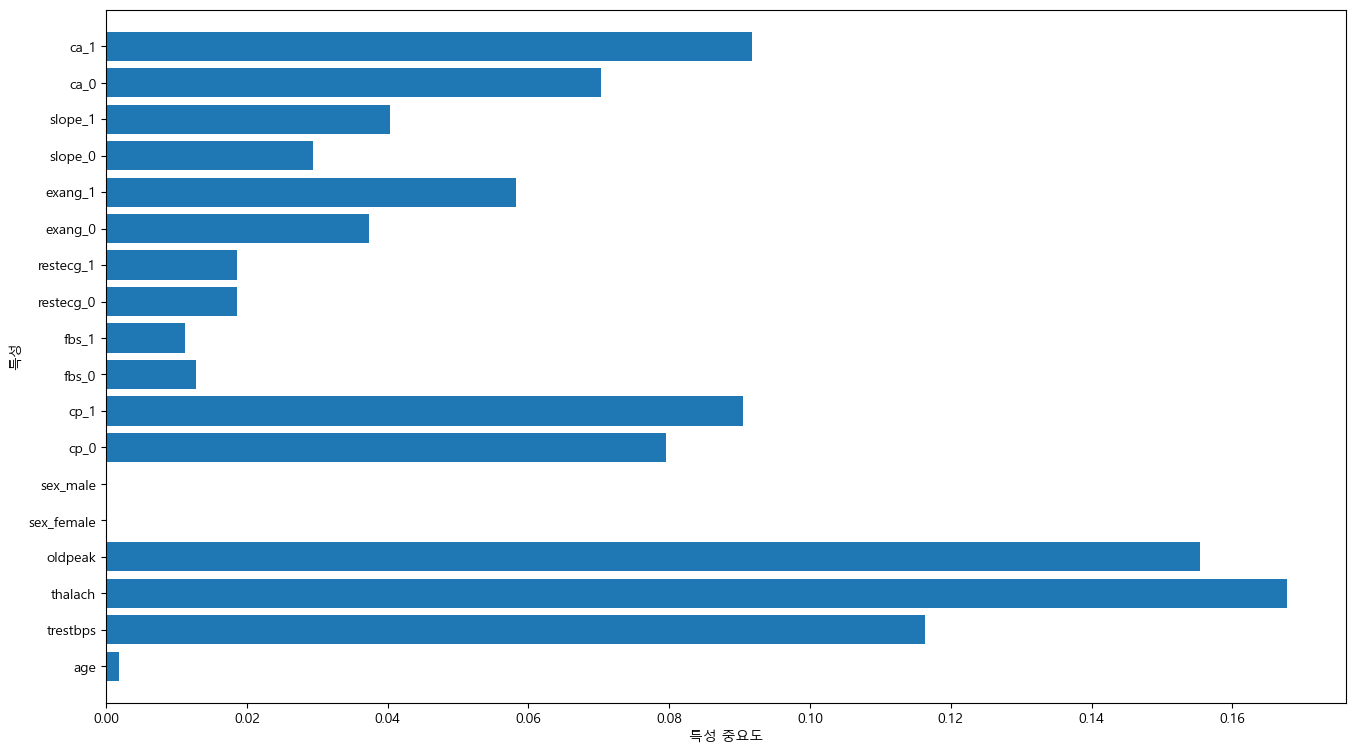

In [49]:
#랜덤포레스트의 특성 중요도
import numpy as np
def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams['figure.figsize'] = (16, 9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
plot_tree(forest)

In [50]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('학습용:', knn.score(X_train, y_train))
print('검증용:', knn.score(X_test, y_test))

c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


학습용: 0.9956677541851634
검증용: 0.9901604278074866


c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
#SVM
from sklearn.svm import SVC
svm = SVC(random_state=10)
svm.fit(X_train, y_train)
print("학습용:", svm.score(X_train, y_train))
print("검증용:", svm.score(X_test, y_test))

학습용: 0.932983901160614
검증용: 0.9232085561497326


In [52]:
#파라미터 튜닝
param = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
}
svm = SVC(random_state=10)
svm.fit(X, y)
gs = GridSearchCV(svm, 
                  param_grid=param, 
                  n_jobs=-1,
                  cv=5)
gs.fit(X_train, y_train)
gs.best_estimator_

SVC(C=10, gamma=0.1, random_state=10)

In [53]:
#최적의 파라미터 적용
svm = gs.best_estimator_
score_tr = svm.score(X_train, y_train)
score_te = svm.score(X_test, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)

학습용: 0.983687222549072
검증용: 0.9813903743315509


In [54]:
result_tr.append(score_tr)
result_te.append(score_te)

In [55]:
#인공신경망
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=10, max_iter=1000, activation='relu')
mlp.fit(X_train, y_train)
score_tr = mlp.score(X_train, y_train)
score_te = mlp.score(X_test, y_test)
print("학습용:", score_tr)
print("검증용:", score_te)

학습용: 0.9999465154837675
검증용: 1.0


In [56]:
#파라미터 튜닝
param = {
    'hidden_layer_sizes': [(50, ), (100, )],
}
mlp = MLPClassifier(random_state=10, max_iter=1000, activation='relu', alpha=0.02)
mlp.fit(X, y)
gs = GridSearchCV(mlp, 
                  param_grid=param, 
                  n_jobs=-1,
                  cv=5)
gs.fit(X_train, y_train)
gs.best_estimator_

MLPClassifier(alpha=0.02, max_iter=1000, random_state=10)

In [57]:
#최적의 파라미터 적용
mlp = gs.best_estimator_
score_tr = mlp.score(X_train, y_train)
score_te = mlp.score(X_test, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)

학습용: 0.9983954645130235
검증용: 0.9970053475935828


In [58]:
result_tr.append(score_tr)
result_te.append(score_te)

In [59]:
#DNN
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, input_shape=(X.shape[1], ), activation='relu', name='hidden-1'))
model.add(Dense(64, activation='relu', name='hidden-2'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5)
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=500, callbacks=es)

Epoch 1/500
468/468 [==============================] - 3s 4ms/step - loss: 0.3099 - accuracy: 0.8730 - val_loss: 0.2321 - val_accuracy: 0.9147
Epoch 2/500
468/468 [==============================] - 2s 4ms/step - loss: 0.1948 - accuracy: 0.9228 - val_loss: 0.1545 - val_accuracy: 0.9401
Epoch 3/500
468/468 [==============================] - 2s 3ms/step - loss: 0.1186 - accuracy: 0.9551 - val_loss: 0.0945 - val_accuracy: 0.9623
Epoch 4/500
468/468 [==============================] - 2s 3ms/step - loss: 0.0734 - accuracy: 0.9734 - val_loss: 0.0543 - val_accuracy: 0.9866
Epoch 5/500
468/468 [==============================] - 2s 4ms/step - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.0413 - val_accuracy: 0.9869
Epoch 6/500
468/468 [==============================] - 2s 4ms/step - loss: 0.0405 - accuracy: 0.9856 - val_loss: 0.0341 - val_accuracy: 0.9920
Epoch 7/500
468/468 [==============================] - 2s 5ms/step - loss: 0.0339 - accuracy: 0.9888 - val_loss: 0.0271 - val_accuracy: 0.9928

In [61]:
loss, score_tr = model.evaluate(X_train, y_train, verbose=0)
loss, score_te = model.evaluate(X_test, y_test, verbose=0)
print(score_tr)
print(score_te)

0.9940097332000732
0.9955080151557922


In [62]:
result_tr.append(score_tr)
result_te.append(score_te)

In [63]:
#알고리즘별 예측도 그래프
methods = ['LOGIT', 'Tree', 'RF', 'SVM', 'ANN', 'DNN']

# 훈련용 데이터셋의 정확도
result_tr_arr = np.array(result_tr)

# 가장 좋은 정확도
max_rate_tr = np.max(result_tr_arr)

# 가장 성능이 좋은 인덱스
idx_tr = np.argmax(result_tr_arr)

# 검증용 데이터셋의 정확도
result_te_arr = np.array(result_te)

# 가장 좋은 정확도
max_rate_te = np.max(result_te_arr)

# 가장 성능이 좋은 인덱스
idx_te = np.argmax(result_te_arr)

print(methods)
print(result_tr)
print(result_te)
print('최적의 모형(학습용):', methods[idx_tr])
print('최고 정확도(학습용):', max_rate_tr)
print('최적의 모형(검증용):', methods[idx_te])
print('최고 정확도(검증용):', max_rate_te)

['LOGIT', 'Tree', 'RF', 'SVM', 'ANN', 'DNN']
[0.8488527571268117, 0.9789805851206076, 0.9765202973739102, 0.983687222549072, 0.9983954645130235, 0.9940097332000732]
[0.8468449197860962, 0.9741176470588235, 0.9724064171122995, 0.9813903743315509, 0.9970053475935828, 0.9955080151557922]
최적의 모형(학습용): ANN
최고 정확도(학습용): 0.9983954645130235
최적의 모형(검증용): ANN
최고 정확도(검증용): 0.9970053475935828


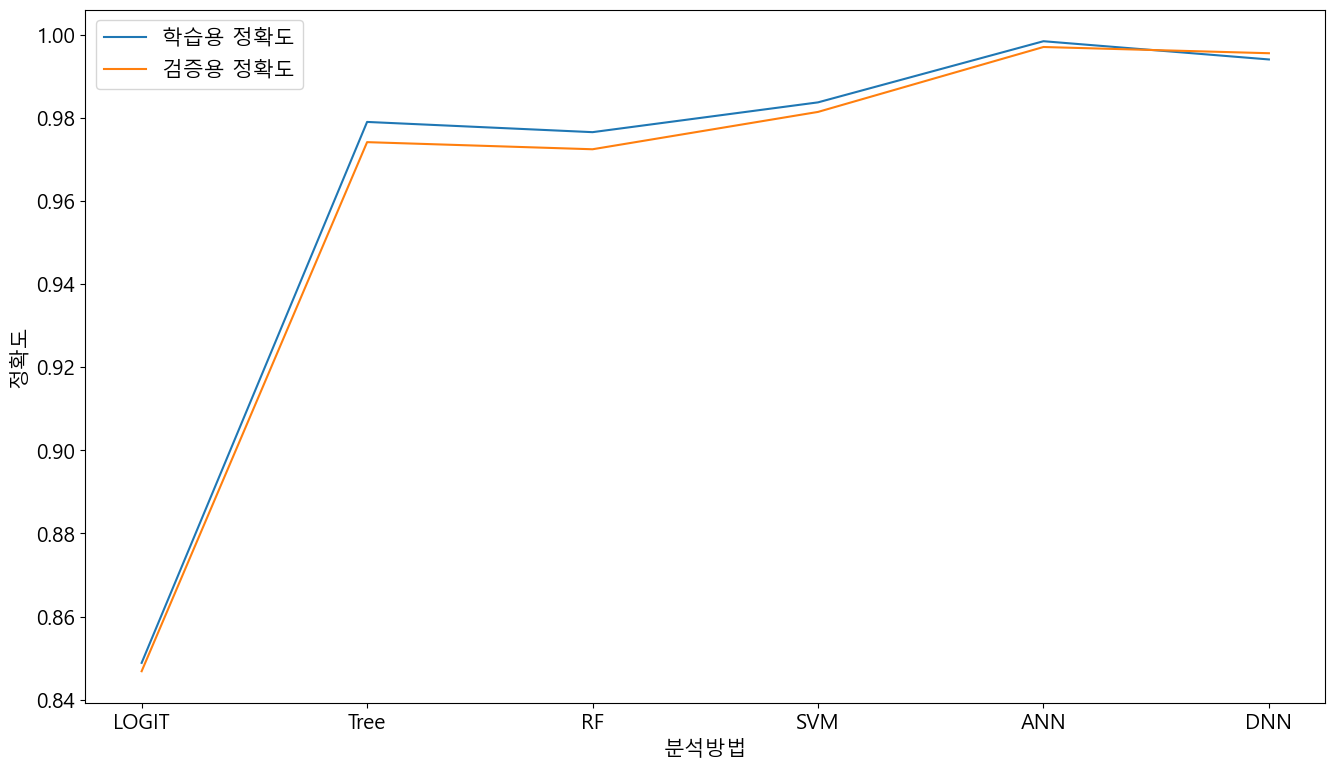

In [64]:
plt.rcParams["font.size"]=15
plt.plot(methods, result_tr_arr, label="학습용 정확도")
plt.plot(methods, result_te_arr, label="검증용 정확도")
plt.xlabel('분석방법')
plt.ylabel("정확도")
plt.legend()
plt.show()

In [65]:
import joblib
#모델 저장
model.save('./hypertension_model.h5')
joblib.dump(mlp, './hypertension_mlp.h5')

#scaler 백업
joblib.dump(scaler, './scaler.sav')

['./scaler.sav']

### 모델 테스트

In [66]:
#모델, 스케일러 로드
from keras.models import load_model
model = load_model('./hypertension_model.h5')
mlp = joblib.load('./hypertension_mlp.h5')
sacler = joblib.load('./scaler.sav')

In [67]:
test_set = pd.read_csv('./test_set.csv')
tscols = test_set.columns
test_set_X = test_set[tscols[1:-1]]
test_set_y = test_set[tscols[-1]]

In [68]:
idx = np.random.randint(0, len(test_set) + 1, 10)
test_set_X = test_set_X.iloc[idx]
test_set_y = test_set_y.iloc[idx]

In [76]:
for i in range(10):
    test_i = [list(test_set_X.iloc[i].values)]
    test_set_scaled = scaler.transform(test_i)
    print(mlp.predict_proba(test_set_scaled)[0][1])

0.9785288636216698
0.9999999996033144
0.9990265169839752
0.9999996635150472
0.9990952413629021
0.4439495188963585
0.9992054085457095
0.9806202214539222
0.9349896127420398
0.8690602374729218


c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c

In [70]:
for i in range(10):
    test_i = [list(test_set_X.iloc[i].values)]
    test_set_scaled = scaler.transform(test_i)
    print(model.predict(test_set_scaled))

1/1 [==============================] - ETA: 0s

c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
[[0.99975497]]
1/1 [==============================] - ETA: 0s

c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
[[1.]]
1/1 [==============================] - 0s 21ms/step
[[0.99999917]]
1/1 [==============================] - 0s 19ms/step
[[1.]]
1/1 [==============================] - ETA: 0s

c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
[[1.]]
1/1 [==============================] - ETA: 0s

c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
[[0.0973253]]
1/1 [==============================] - 0s 18ms/step
[[0.99999833]]
1/1 [==============================] - 0s 18ms/step
[[0.9966365]]
1/1 [==============================] - 0s 18ms/step


c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[0.99775285]]
1/1 [==============================] - ETA: 0s

c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
[[0.8206251]]
